# [Distributions](https://www.kaggle.com/code/alexisbcook/distributions)
## Core Lesson

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random as rd

# Import prepped data
lap_times  = pd.read_csv('./intermediate/lap_times_prepped.csv')
pit_stops  = pd.read_csv('./intermediate/pit_stops_prepped.csv')
qualifying = pd.read_csv('./intermediate/qualifying_prepped.csv')
results    = pd.read_csv('./intermediate/results_prepped.csv')

/var/folders/0p/fnlsdkq159s9phmzxxmms5pc0000gn/T/ipykernel_24713/1033431768.py:10: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  lap_times  = pd.read_csv('./intermediate/lap_times_prepped.csv')


`seaborn` has plotting functions for visualising distributions; chief among them are `histplot` (histograms) and `kdeplot` (kernel density estimates). For example, if we wanted to plot lap times by track, here's how we'd do it with a histogram.

<AxesSubplot:title={'center':'Lap time distribution at a subset of Grands Prix'}, xlabel='seconds', ylabel='Count'>

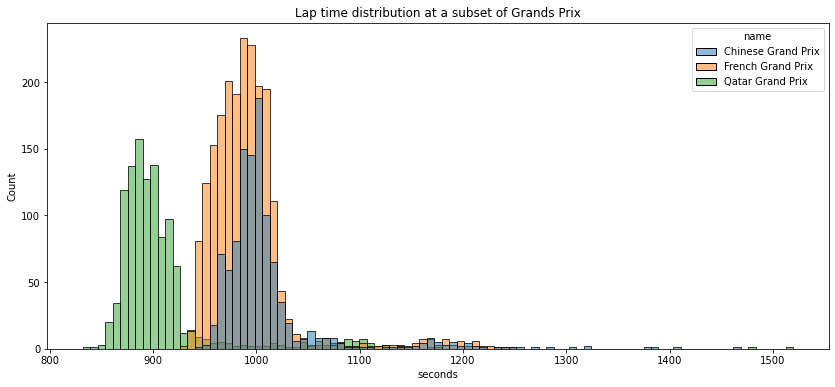

In [12]:
lap_times['seconds'] = lap_times['milliseconds'] / 100

track_sample = rd.sample(lap_times[lap_times.year >= 2019]['name'].unique().tolist(), 3)

lap_time_subset = lap_times.loc[
    (lap_times.name.isin(track_sample)) & 
    (lap_times.year >= 2019)
]

# Plot
plt.figure(figsize = (14, 6))
plt.title(f"Lap time distribution at a subset of Grands Prix")

sns.histplot(data = lap_time_subset, x = 'seconds', hue = 'name')

The same data with a kernel density estimator looks like this:

<AxesSubplot:title={'center':'Lap time distribution at a subset of Grands Prix'}, xlabel='seconds', ylabel='Density'>

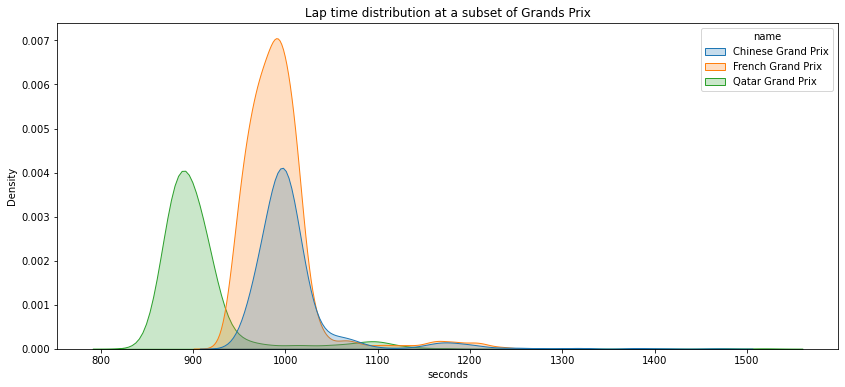

In [18]:
# Plot
plt.figure(figsize = (14, 6))
plt.title(f"Lap time distribution at a subset of Grands Prix")

sns.kdeplot(data = lap_time_subset, x = 'seconds', hue = 'name', shade = True)

We can also get 2D kernel density estimates with `sns.jointplot`:

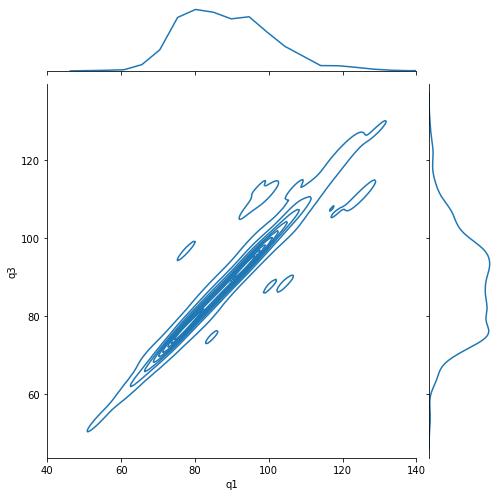

In [29]:
# Plot
sns.jointplot(
    data = qualifying, 
    x = 'q1', y = 'q3', 
    kind = 'kde', 
    xlim = (40, 140), 
    height = 7
)